# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

# x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
# y = np.random.binomial(1, 0.5, 5)
# x, y

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
np.random.seed(123)
n1 = 500
n2 = 500
x1 = np.random.multivariate_normal(m1, sigma, n1)
x2 = np.random.multivariate_normal(m2, sigma, n2)
X_generative = np.vstack([x1, x2])
Y_generative = np.concatenate([np.ones(n1), np.zeros(n2)])

In [5]:
# alternatively
n = 1000
pi1 = 0.5
Y_generative = np.random.binomial(1, pi1, size=n)
X_generative = (np.random.multivariate_normal(m1, sigma, n).T*Y_generative + np.random.multivariate_normal(m2, sigma, n).T*(1-Y_generative)).T

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


**Answer:** Yes. We have that

$$p(x|y=1) = (2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2) = C\exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2)$$
and
$$p(x|y=-1) = (2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2) = C\exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2).$$
Thus
$$p(y=1|x) = \frac{\pi p(x|y=1)}{p(x)} = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)} = \frac{\pi p(x|y=1)/(1-\pi) p(x|y=-1)}{\pi p(x|y=1)/(1-\pi) p(x|y=-1) + 1}.$$
The nominator equals
$$\pi p(x|y=1)/(1-\pi) p(x|y=-1) = \exp(x'\Sigma^{-1}m_1 + \log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2),$$
hence
$$\beta_0=\log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2,$$
$$\beta = \Sigma^{-1}(m_1 - m_2).$$

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

**Answer:** See above.

In [6]:
# computing beta_0 and beta using the formulas

sigma_inv = np.linalg.inv(sigma)
beta = sigma_inv.dot(m1 - m2)
pi1 = 0.5
beta0 = np.log(pi1) - np.log(1 - pi1) + m2.dot(sigma_inv.dot(m2))/2 - m1.dot(sigma_inv.dot(m1))/2
(beta0, beta)

(-2.0, array([2., 2.]))

In [7]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.00193207]), array([[2.13678543, 1.99123232]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [8]:
# sampling
n = 1000
x1 = np.random.multivariate_normal(m1, sigma, n)
x2 = np.random.multivariate_normal(m2, sigma, n)
mixture_coef = np.random.binomial(1, 0.5, n)
X_discriminative = np.vstack((x1[mixture_coef == 0,:], x2[mixture_coef == 1,:]))
probability_y = 1/(1+np.exp(-(-2 + np.dot(X_discriminative, np.array([2,2])))))
Y_discriminative = np.random.binomial(1, probability_y, n)

In [9]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.86844626]), array([[1.91169471, 1.99402678]]))

#### Second bullet point

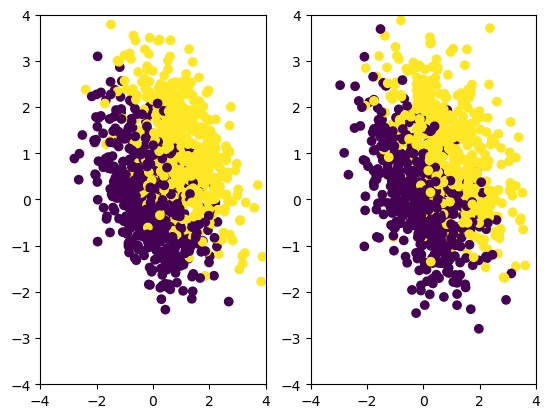

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

**Answer:** We have the same joint distributions of $p(x,y)$ (as seen in scatterplots), but the two approches differ from a simulation and modeling point of view. For example, in generative approach we cannot estimate $\pi$. In generative approach $\pi$ and $beta_0$ are entangled as indicated by the formulas in a). 

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Answer:** We can use a formula, we obtained in a)

$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}.$$

Now we transform to get a formula for $p(x|y=-1)$:

$$ p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}.$$

We plug in $p(x|y=1) = \exp(-x)$ as $X$ given $Y=1$ follows an exponential distribution with $\lambda=1$, $p(y=1|x) = 1/(1+\exp(-\beta_0-\beta_1 x))$ (a logistic model assumption) and $p(y=-1|x) = 1/(1+\exp(\beta_0+\beta_1 x))$, thus

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x).$$

$X$ given $Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$.

------

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

------
If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

Homework: find $C_{\beta_0, \pi}$. Next, knowing that $C_{\beta_0, \pi} = \beta_1+1$, derive the formula for $\beta_0$.

### Q2, Q3 answer:

We know from the previous point that $X$ given $Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$. On the other hand, the general formula for density of the exponential distributon is: $$\phi_{\lambda}(x) = \lambda \exp(-\lambda x) \cdot\mathbb{1}_{(x \geq 0)}$$

Thus, we can conclude that $C_{\beta_0, \pi} = \beta_1+1$. Now, we will find the formula for $C_{\beta_0, \pi} \exp(-(\beta_1+1)x)$: 
$$ p(x|y=-1) = \frac{\pi e^{-x}}{e^{\beta_0 + \beta_1 x}(1-\pi)} = \frac{\pi}{1-\pi} \cdot e^{-x}\cdot e^{-\beta_0}\cdot e^{-\beta_1 x} = \frac{\pi}{1-\pi} \cdot e^{-\beta_0} \cdot e^{-(1+\beta_1) x}$$

Thus, $$C_{\beta_0, \pi} = \frac{\pi}{1-\pi} \cdot e^{-\beta_0}$$

We can find the formula for $\beta_0$ by the equivalent transformations:
$$\frac{\pi}{1-\pi} \cdot e^{-\beta_0} = \beta_1+1$$
$$ e^{-\beta_0} = \frac{(1-\pi)(\beta_1+1)}{\pi}$$
$$ \beta_0 = ln\Big(\frac{\pi}{(1-\pi)(\beta_1+1)} \Big) $$
where $\beta_1 > -1$ 

Looking at the formula, we can conclude that $\beta_0$ is dependent also on $\beta_1$ so we are not free to choose the intercept when $\pi$ is fixed, which answers the Q2 question. We can also conclude from the formula for $\beta_0$ that when the $\pi$ is not given, the intercept is not uniquely determined, as it explicitly depends on the $\pi$ distribution.

In [12]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [13]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.41687531]), array([[1.04573334]]))

In [14]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)